**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---


* NOMBRE: Marcos Eduardo García Ortiz
* MATRÍCULA: A01276213
* NOMBRE: Renzo Antonio Zagni Vestrini
* MATRÍCULA: A01795457
* NOMBRE: Jorge Barón
* MATRÍCULA: A01422588
* NOMBRE: Dalia Isabel López Tapia
* MATRÍCULA: A01245026

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
cereals_df.describe().T


,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [7]:
cereals_df.describe(include='object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


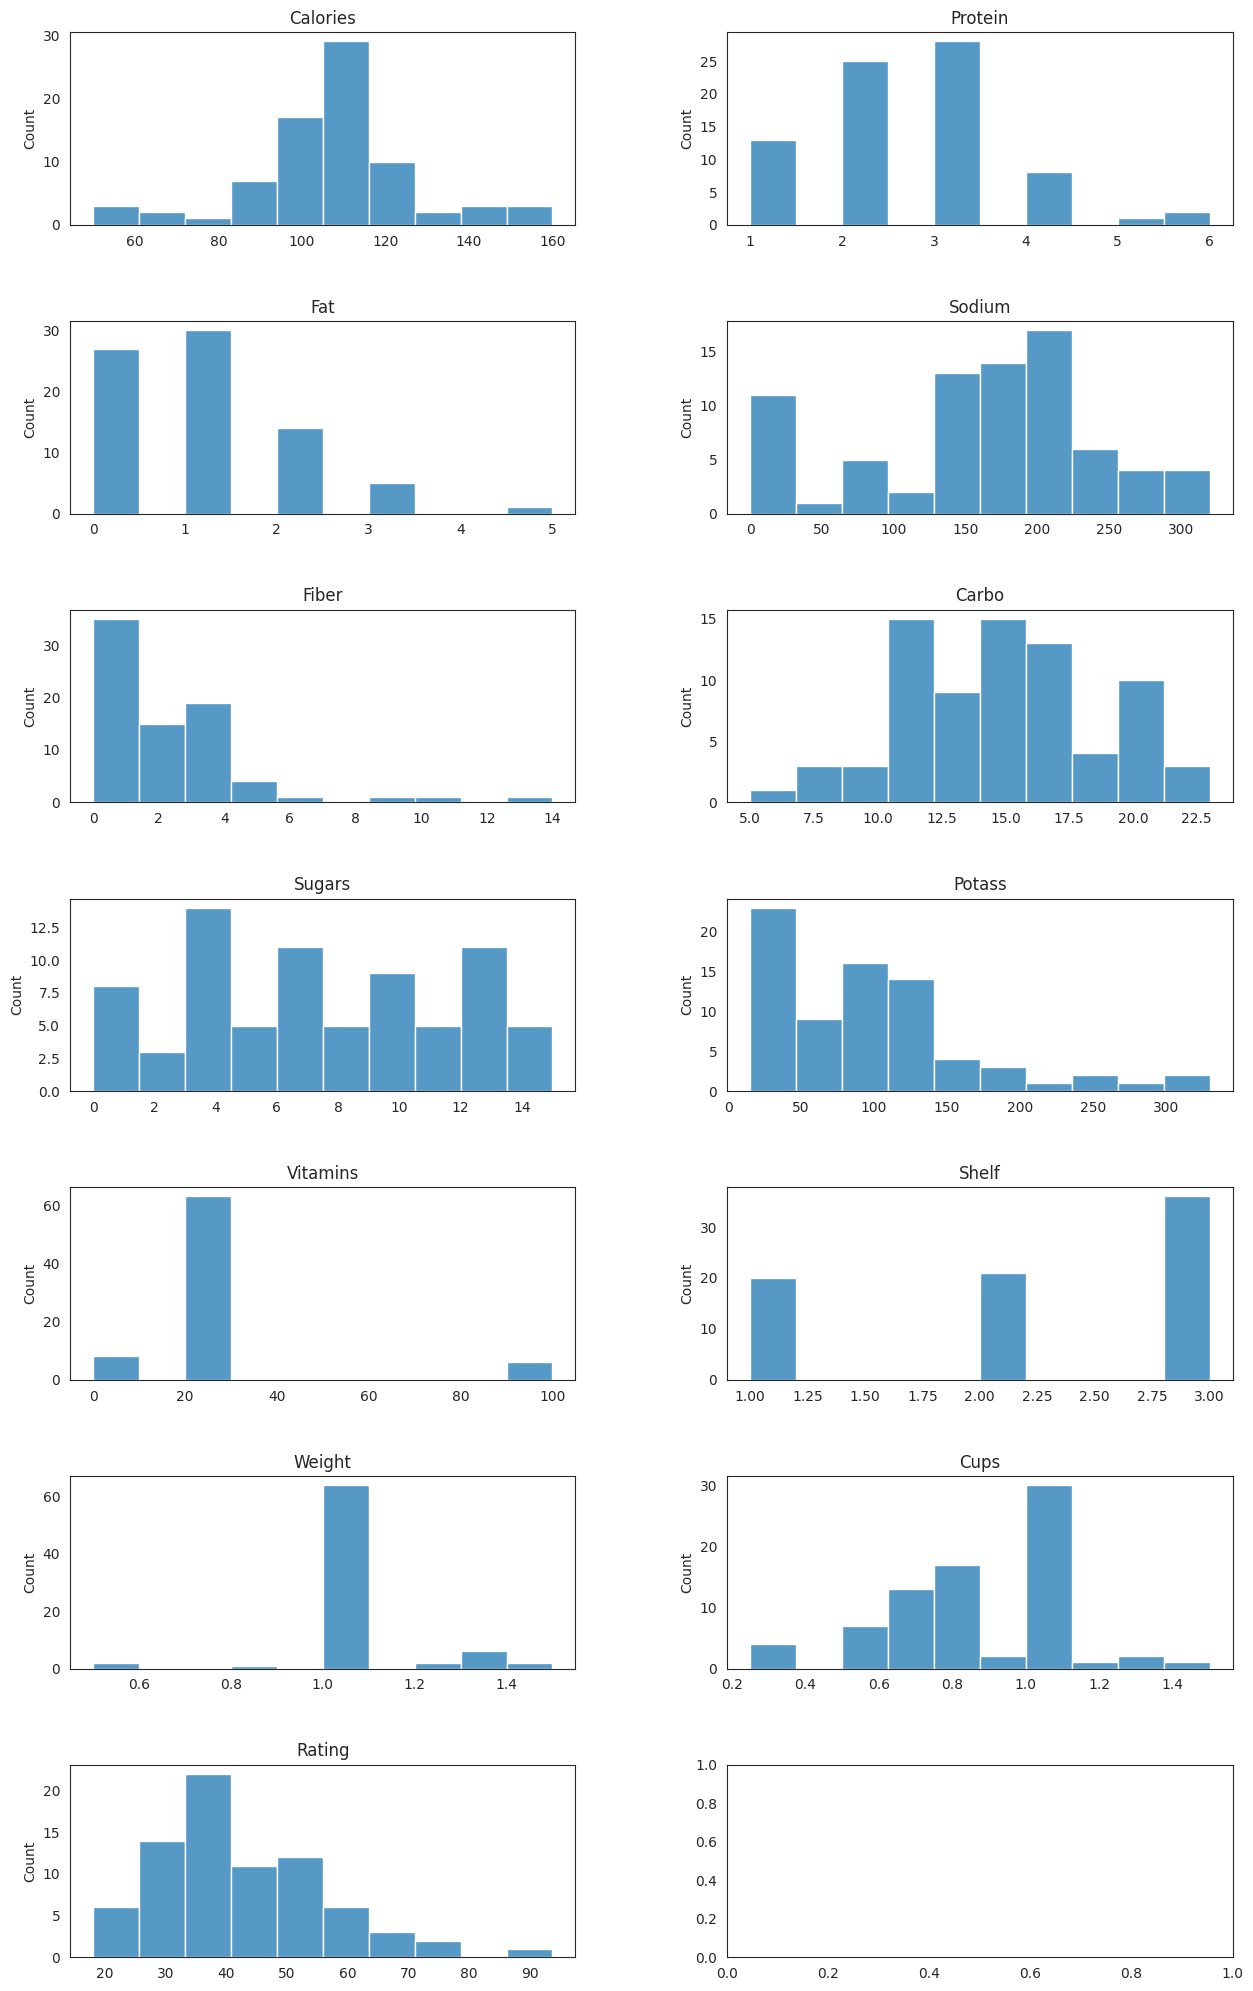

In [8]:
# Tipo de Datos Cuantitativos
sns.set_style('white')
fig, axes = plt.subplots(7,2, figsize=(15,25))
axes = axes.ravel()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(cereals_df.select_dtypes(include=np.number).columns.tolist(), axes):
  sns.histplot(x=cereals_df[colname],ax=ax,bins=10)
  ax.set(title=f'{(colname).capitalize()}', xlabel=None)

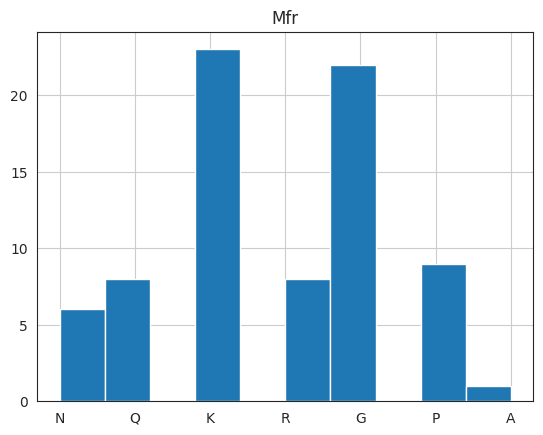

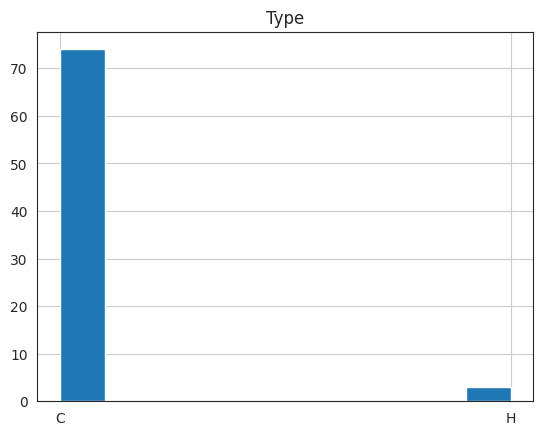

In [9]:
# Tipo de Datos Categoricos
for colname in cereals_df.select_dtypes(include='object').columns.tolist():
  # Omitimos la columna
  if colname != 'name':
    plt.title(colname.capitalize())
    cereals_df[colname].hist()
    plt.show()

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

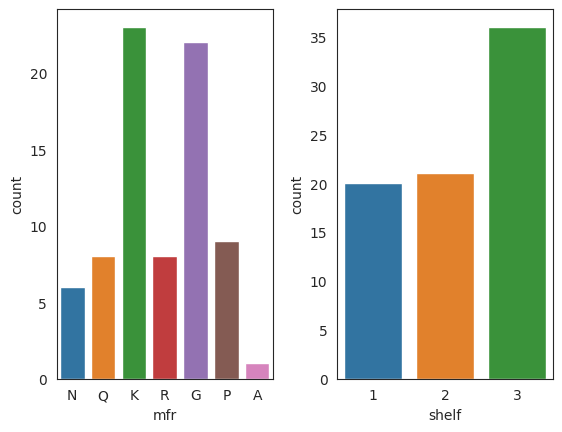

In [10]:
fig,axes= plt.subplots(1,2)
plt.subplots_adjust(wspace=0.3)
sns.countplot(data=cereals_df, x="mfr",ax=axes[0])
sns.countplot(data=cereals_df, x="shelf",ax=axes[1] )
plt.show()
# Podemos observar en esta primera gráfica como se distribuyen la cantidad de
# cereales para cada una de las marcas en el grafico de la izquierda donde el
# mayor recuento es para la marca identificada con la letra K es decir Kellogs
# y en la gráfica de la derecha se generá el conteo de como los cereales son
# puestos en diferentes niveles de estantes considerando desde el piso hacía
# arriba donde el mayor número de cereales se colocan en el estante 3

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.


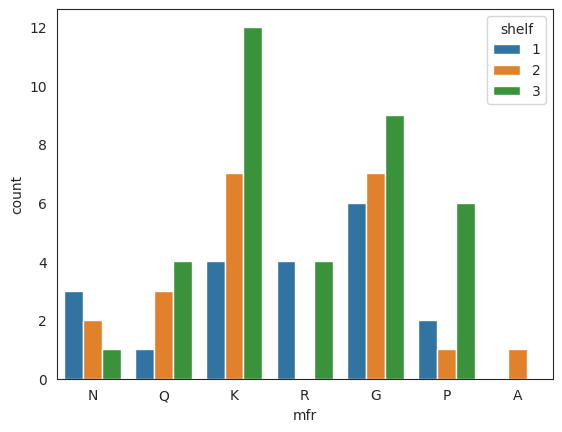

In [11]:
# Ahora se realiza un análisis más profundo respecto a como cada marca de
# cereales es colocada en los estantes dentro de los insights relevantes
# observamos como la marca Kellogs es colocada en los estantes superiores mas
# que cualquier otra marca
sns.countplot(data=cereals_df,x='mfr', hue='shelf')
plt.show()

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?



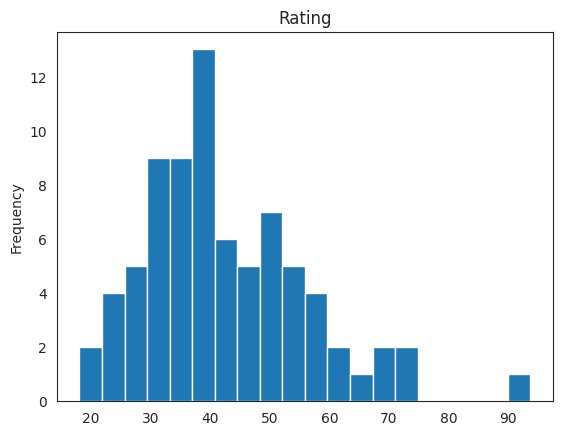

In [12]:
# Analizando el histograma para la variable `rating` se puede observar que el
# rango de mayor frecuencia es el correspondiente a algo cercano de 37 a 40
# donde se encuentran la mayoria de valoraciones
plt.title('Rating')
cereals_df['rating'].plot(kind='hist', bins=20)
plt.show()

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [13]:
# Realizando el ordenamiento de los datos en base al rating es posible extraer
# el top 10 presentado en formato de tabla para mostrar los fabricantes y el
# nombre del cereal el top 10 lo encabezan Kellogs, Nabisco y Quaker Oats con
# sus productos lideres donde se puede observar que su buena valoración esta
# relacionada a que son cereales altos en fibra o de avena.
cereals_df.sort_values('rating', ascending=False)[['name','mfr','rating']][:10]

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


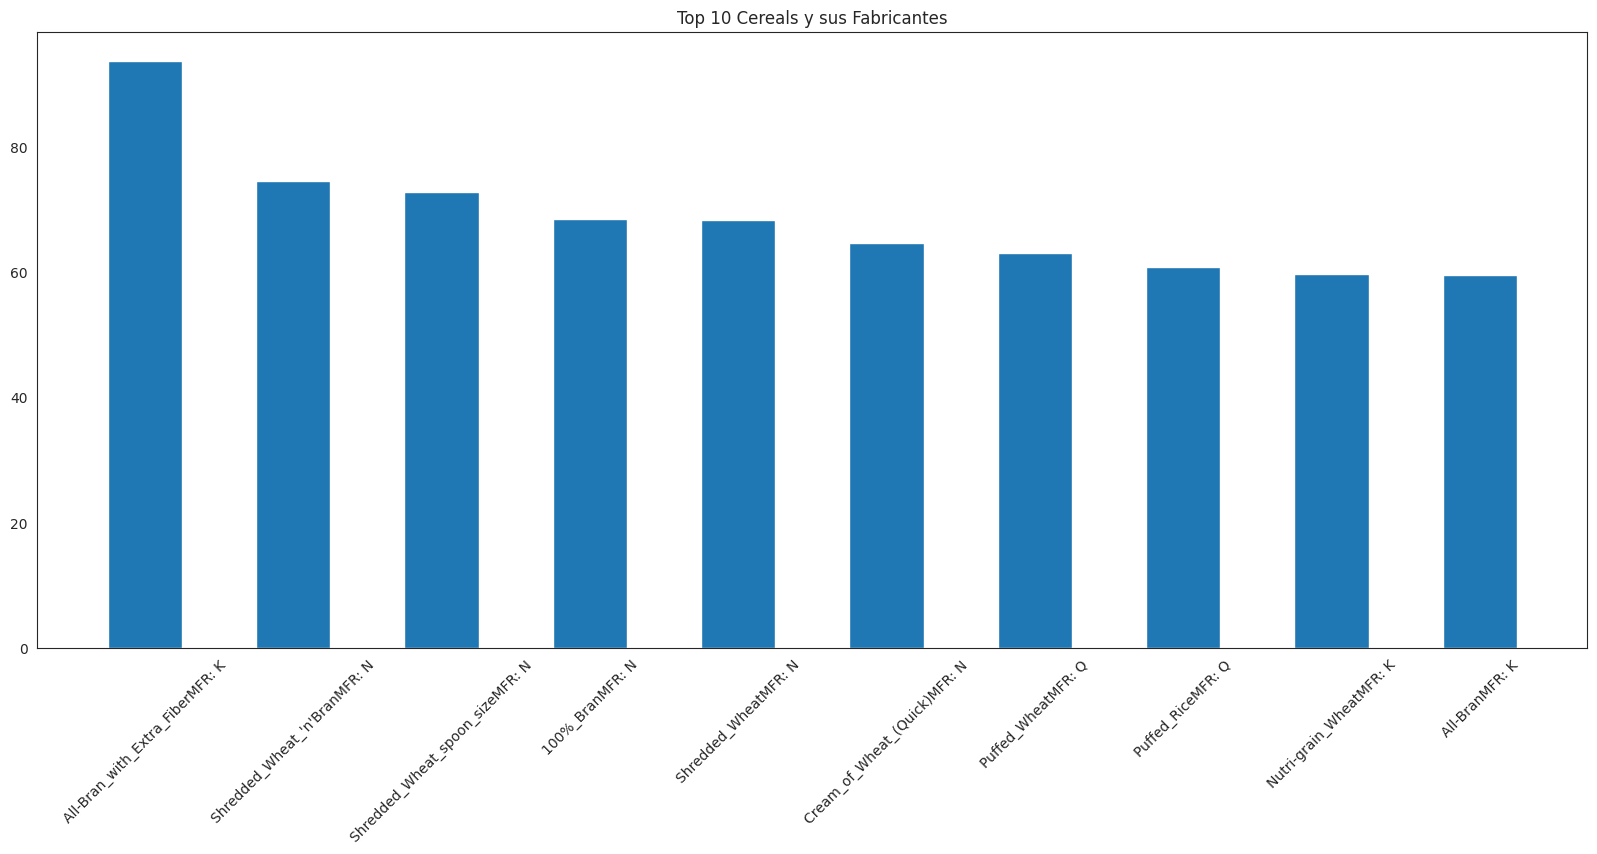

In [14]:
top10_cereals_df = cereals_df.nlargest(10, 'rating')
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title("Top 10 Cereals y sus Fabricantes")
plt.bar(top10_cereals_df['name'] + "MFR: " + top10_cereals_df['mfr'], top10_cereals_df['rating'], width=0.5)
plt.show()

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

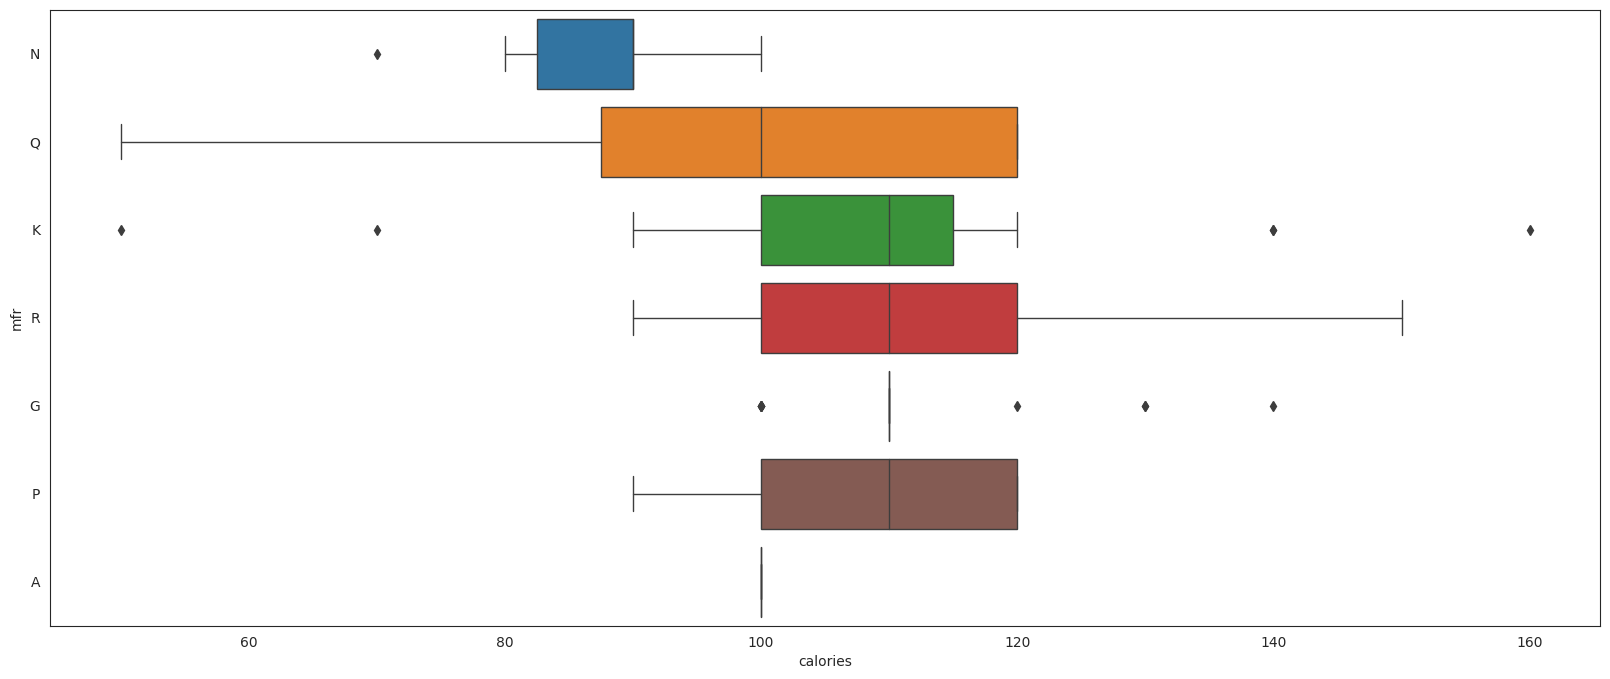

In [15]:
# Analizando las distribuciones todos los fabricantes se en
plt.figure(figsize=(20,8))
sns.boxplot(cereals_df, x='calories', y='mfr', linewidth= 1.0)
plt.show()
# Mediante el análisis del boxplot de las calorias para los cereales de cada una
# de las marcas podemos observar que todas se encuentran en un rango de entre 80
# y 120 calorias algunas marcas presentan outliers relacionados con la cantidad
# de grasa y peso, podemos observar como K, G, R y P tienen la misma media de
# calorias posiblemente para que sus productos puedan competir entre si

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

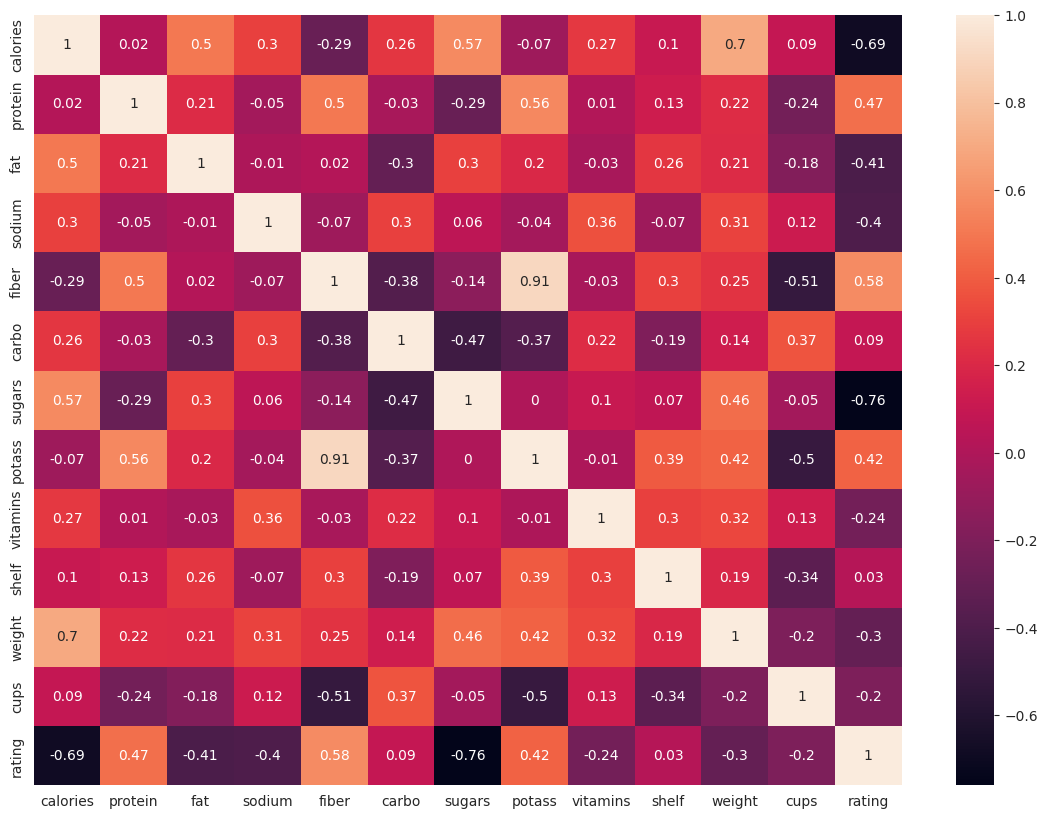

In [16]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (14, 10))
sns.heatmap(round(cereals_df.corr(),2), annot = True)
plt.show()
#  Las dos variables que tienen mayor correlación con rating son Fiber y Protein

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [17]:
cereals_df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [18]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)

In [19]:
cereals_df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [20]:
y = cereals_df.loc[:,'rating']
x = cereals_df.iloc[:,3:-1]
total_components = x.shape[1]
total_components

12

In [21]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332,  0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332, -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332, -0.30592203]])

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pd.DataFrame(pca.fit_transform(x_scaled))
x_projected

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,-0.247787,-0.124799,0.046331,0.238706,0.021342
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0.895201,-0.835394,-0.595071,0.069954,-0.089523
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0.182089,0.139267,0.090776,-0.488302,-0.035570
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0.865569,-0.682678,0.099300,0.708471,0.108198
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,-0.808361,-0.712896,-0.100511,0.093129,-0.076342
...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,0.690165,0.353600,-0.017534,-0.281347,0.108000
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,0.259556,-0.021133,-0.100748,0.107726,0.101983
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,-0.616101,-0.591177,0.112252,-0.107794,0.051736
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,0.009124,-0.604610,-0.008312,0.025462,0.027293


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

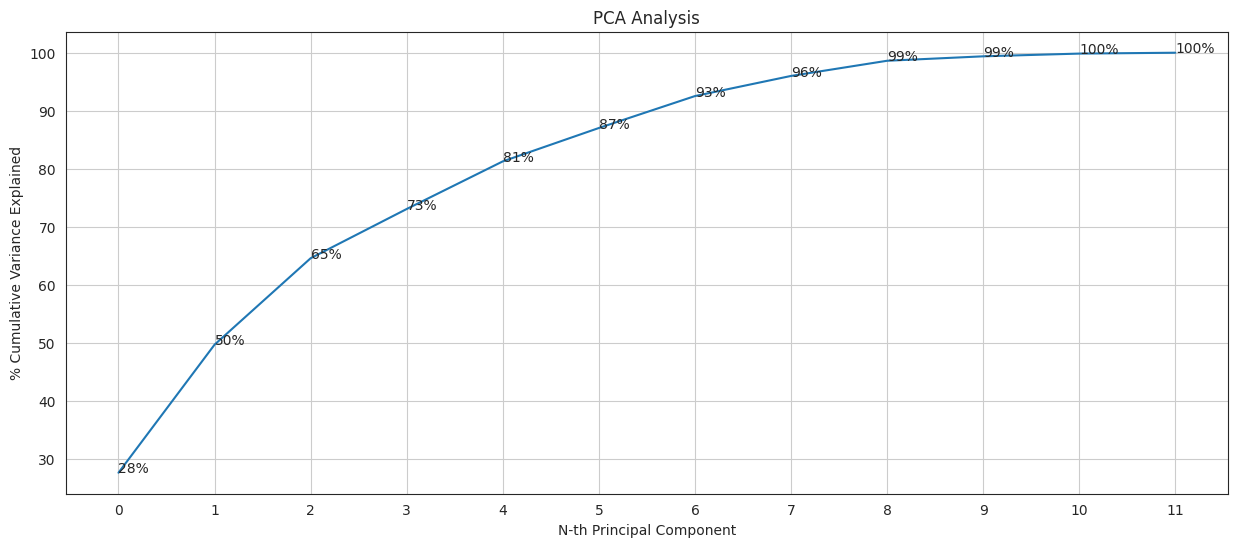

In [23]:
sns.set_style('white')
plt.figure(figsize=(15,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
plt.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

In [24]:
i = 0
for colname in x.columns:
  print("Porcentaje de Varianza de " + colname.capitalize() + ": " + str(round(pca.explained_variance_ratio_[i] * 100, 2)) + "%")
  i += 1

Porcentaje de Varianza de Calories: 27.66%
Porcentaje de Varianza de Protein: 22.06%
Porcentaje de Varianza de Fat: 14.88%
Porcentaje de Varianza de Sodium: 8.48%
Porcentaje de Varianza de Fiber: 8.2%
Porcentaje de Varianza de Carbo: 5.75%
Porcentaje de Varianza de Sugars: 5.5%
Porcentaje de Varianza de Potass: 3.47%
Porcentaje de Varianza de Vitamins: 2.61%
Porcentaje de Varianza de Shelf: 0.76%
Porcentaje de Varianza de Weight: 0.47%
Porcentaje de Varianza de Cups: 0.15%


In [25]:
num_components = 10
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principal component 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principal component 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
Principal component 4,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683
Principal component 5,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826
Principal component 6,0.196806,0.176822,0.299822,0.462005,0.084635,0.446257,0.061289,0.068499,0.279949,0.133268,0.316544,0.464295
Principal component 7,0.062276,0.260647,0.247778,0.608269,0.095668,0.026962,0.186843,0.147455,0.168034,0.124162,0.186826,0.593052
Principal component 8,0.004882,0.418610,0.054129,0.167525,0.218240,0.172049,0.067793,0.265667,0.460537,0.416013,0.076551,0.500321
Principal component 9,0.043225,0.518397,0.438048,0.247337,0.258082,0.135796,0.251199,0.186550,0.337770,0.415500,0.067996,0.045104
Principal component 10,0.495843,0.019565,0.147950,0.005456,0.292832,0.243900,0.247413,0.185987,0.051953,0.047086,0.692720,0.077575


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


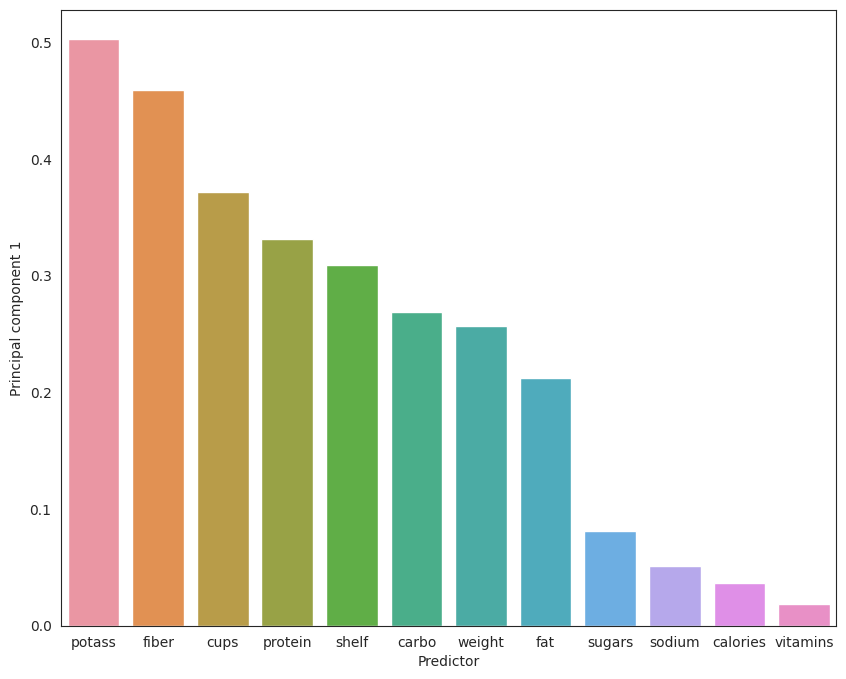

In [26]:
# las tres variables mas importantes son: Potass, Fiber & Cups
plt.figure(figsize = (10, 8))
dd = pd.DataFrame(pc_df.iloc[0])
dd = dd.sort_values(by=['Principal component 1'], ascending=False)
dd.reset_index(inplace=True)
dd = dd.rename(columns = {'index':'Predictor'})
sns.barplot(data=dd, x='Predictor', y='Principal component 1')
plt.show()

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [27]:
cereals_df.describe(include='object').T

,count,unique,top,freq
name,74,74,100%_Bran,1
mfr,74,7,K,23
type,74,2,C,73


In [28]:
cereals_df['shelf'].nunique()

3

In [29]:
# Las variables categoricas que se pueden utilizar como predictoras son "mfr" y
# "type". La variable "name" esta conformada por valores unicos (alta cardinalidad)
# por lo cual no se puede considerar como predictora.
#
# Por otra lado, cabe acotar que la variable numerica "shelf" se puede considerar
# como variable categorica de tipo ordinal. Esta a su vez se puede considerar
# como predictora
#
# Para las variables categoricas nominales "mgr" y "type" utilizaremos el metodo
# One Hot encoding ya que no existe relacion ordinal de los valores y en ese
# caso el use del encoding ordinal puede generar valores erroneos

In [30]:
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(drop='first',sparse_output=False)
few_cardinal_variables = ['mfr', 'type']
# transform data
onehot_df = encoder.fit_transform(cereals_df[few_cardinal_variables])
onehot_df = pd.DataFrame(onehot_df, columns=encoder.get_feature_names_out())
onehot_df

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [31]:
# Como la variación porcentual acumulada para los componentes principales 1 y 2
# es del 96%, solo se utilizarán sus proyecciones en el nuevo conjunto de datos
new_data = x_projected.iloc[:,0:num_components]
# Assign names to projections on components
new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]
new_data = pd.concat([new_data,onehot_df,y], axis=1)
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,rating
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,-0.247787,-0.124799,0.046331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0.895201,-0.835394,-0.595071,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0.182089,0.139267,0.090776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0.865569,-0.682678,0.099300,0.0,1.0,0.0,0.0,0.0,0.0,0.0,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,-0.808361,-0.712896,-0.100511,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,0.690165,0.353600,-0.017534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,0.259556,-0.021133,-0.100748,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,-0.616101,-0.591177,0.112252,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,0.009124,-0.604610,-0.008312,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193


In [32]:
# Alamcenamos el data frame en un archivo CSV en Google Drive
new_data.to_csv('cereals_afterPCA.csv')